# Making Country Dataset Accessible 

## prerequisite python libraries
### country_converter
* Using [country_converter](https://pypi.org/project/country-converter/)
* [Examples in Jupyter Notebook](http://nbviewer.ipython.org/github/konstantinstadler/country_converter/blob/master/doc/country_converter_examples.ipynb)

In [1]:
import country_converter as coco

In [2]:
import pandas as pd
import numpy as np

## Data: World Happiness Report 2022 -- Data for Figure 2.1 

* HTML source: [WHR 2022](https://worldhappiness.report/ed/2022/#appendices-and-data)
* Data source: [Data for Figure 2.1](https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls)

### Data collection

In [3]:
URL = "https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls"

df = pd.read_excel(URL)

In [4]:
df_original = df.copy()

In [5]:
# df = df_original

### Data refining / cleaning

In [6]:
df = df.replace ("xx", np.nan).set_index("RANK").dropna(how = "all")

In [7]:
## illustrative examples

names_input = df ["Country"]

name_short_dict = coco.convert(names=names_input, to='name_short')
name_short_dict 
print (name_short_dict)

cc = coco.CountryConverter()
name_short = cc.pandas_convert(series=df ["Country"], to='name_short')
name_short

['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand', 'Austria', 'Australia', 'Ireland', 'Germany', 'Canada', 'United States', 'United Kingdom', 'Czech Republic', 'Belgium', 'France', 'Bahrain', 'Slovenia', 'Costa Rica', 'United Arab Emirates', 'Saudi Arabia', 'Taiwan', 'Singapore', 'Romania', 'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania', 'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua', 'Mexico', 'Croatia', 'Poland', 'El Salvador', 'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea', 'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyz Republic', 'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia', 'Dominican Republic', 'Malaysia', 'Bolivia', 'China', 'Paraguay', 'Peru', 'Montenegro', 'Ecuador', 'Vietnam', 'Turkmenistan', 'Cyprus', 'Russia', 'Hong Kong', 

RANK
1          Finland
2          Denmark
3          Iceland
4      Switzerland
5      Netherlands
          ...     
142       Botswana
143         Rwanda
144       Zimbabwe
145        Lebanon
146    Afghanistan
Name: Country, Length: 146, dtype: object

In [8]:
## codes in production
cc = coco.CountryConverter()
country_output_list = ['name_short', 'ISO2', 'ISO3']

for k in country_output_list:
    df[k] = cc.pandas_convert(series=df ["Country"], to=k, not_found=np.nan)

## index
df = df.reset_index()
_columns_ = list ( df.columns )
_columns_original_ = [x for x in _columns_ if x not in country_output_list]
df = df[country_output_list+_columns_original_]

## check np.nan
check_nan = df[country_output_list].isna().sum()

_array_ = check_nan.values
if (_array_ == 0).all():
    print ("Great! There is no np.nan values in the coutnry outputs. All data entries have produced values.")
else:
    print ("Issues?! ")
    display ( check_nan )


Great! There is no np.nan values in the coutnry outputs. All data entries have produced values.


In [9]:
df

,name_short,ISO2,ISO3,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,FI,FIN,1,Finland,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,Denmark,DK,DNK,2,Denmark,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,Iceland,IS,ISL,3,Iceland,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,Switzerland,CH,CHE,4,Switzerland,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,Netherlands,NL,NLD,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Botswana,BW,BWA,142,Botswana*,3.4711,3.666935,3.275265,0.187416,1.502590,0.815473,0.279801,0.571353,0.012459,0.101993
142,Rwanda,RW,RWA,143,Rwanda*,3.2682,3.462218,3.074182,0.536299,0.785252,0.132698,0.461527,0.621479,0.186662,0.544236
143,Zimbabwe,ZW,ZWE,144,Zimbabwe,2.9951,3.109822,2.880378,0.547529,0.946604,0.690460,0.270086,0.329203,0.106265,0.104943
144,Lebanon,LB,LBN,145,Lebanon,2.9553,3.048951,2.861649,0.215537,1.392068,0.497999,0.630964,0.102799,0.082191,0.033761


In [10]:
display (  df [ df[country_output_list].duplicated(keep=False) ]  )


,name_short,ISO2,ISO3,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
40,Cyprus,CY,CYP,41,Cyprus,6.2209,6.320243,6.121557,2.044133,1.815065,0.909315,0.819165,0.448146,0.123327,0.061780
78,Cyprus,CY,CYP,79,North Cyprus*,5.4666,5.608694,5.324506,1.078338,1.815065,0.888054,0.819165,0.522693,0.130266,0.213033


In [11]:
## cleaning data with Note

_last_ = df [ df[country_output_list].duplicated(keep="first") ] .copy()
_last_ ["name_short"] = _last_ ["Country"]
for k in country_output_list:
    _last_ [k] = _last_ [k].str.replace('*',"", regex=False )+" {note}"
display (_last_)

## updating df
df_old = df.copy()
df.update(_last_)


display (  df [ df_old[country_output_list].duplicated(keep=False) ]  )


,name_short,ISO2,ISO3,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
78,North Cyprus {note},CY {note},CYP {note},79,North Cyprus*,5.4666,5.608694,5.324506,1.078338,1.815065,0.888054,0.819165,0.522693,0.130266,0.213033


,name_short,ISO2,ISO3,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
40,Cyprus,CY,CYP,41.0,Cyprus,6.2209,6.320243,6.121557,2.044133,1.815065,0.909315,0.819165,0.448146,0.123327,0.061780
78,North Cyprus {note},CY {note},CYP {note},79.0,North Cyprus*,5.4666,5.608694,5.324506,1.078338,1.815065,0.888054,0.819165,0.522693,0.130266,0.213033


### Data classification
* cc.valid_class
* cc.valid_country_classifications
* [classification schemes available](https://github.com/konstantinstadler/country_converter#classification-schemes)

In [12]:
## examples

print (cc.valid_class)
print (cc.valid_country_classifications)
print (cc.continent)
print (cc.UNregion)

# 'APEC', 'BASIC', 'BRIC', 'CIS' 'G20', 'G7'

['APEC', 'BASIC', 'BRIC', 'CIS', 'Cecilia2050', 'DACcode', 'EEA', 'EU', 'EU12', 'EU15', 'EU25', 'EU27', 'EU27_2007', 'EU28', 'EURO', 'EXIO1', 'EXIO1_3L', 'EXIO2', 'EXIO2_3L', 'EXIO3', 'EXIO3_3L', 'Eora', 'FAOcode', 'G20', 'G7', 'GBDcode', 'GWcode', 'IEA', 'IMAGE', 'ISO2', 'ISO3', 'ISOnumeric', 'MESSAGE', 'OECD', 'REMIND', 'Schengen', 'UN', 'UNcode', 'UNmember', 'UNregion', 'WIOD', 'ccTLD', 'continent', 'name_official', 'name_short', 'obsolete', 'regex']
['DACcode', 'Eora', 'FAOcode', 'GBDcode', 'GWcode', 'ISO2', 'ISO3', 'ISOnumeric', 'UNcode', 'ccTLD', 'name_official', 'name_short', 'regex']
                    name_short continent
0                  Afghanistan      Asia
1                Aland Islands    Europe
2                      Albania    Europe
3                      Algeria    Africa
4               American Samoa   Oceania
..                         ...       ...
245  Wallis and Futuna Islands   Oceania
246             Western Sahara    Africa
247                      Yemen  

In [13]:
## codes in production

country_region_list = ['continent', 'UNregion']
country_group_list = ['APEC', 'G20', 'G7', 'BRIC', 'CIS' ]
country_classifications_list = country_region_list + country_group_list

for k in country_classifications_list:
    df[k] = cc.pandas_convert(series=df ["name_short"], to=k, not_found=np.nan)

## index for future multi-index columns
_columns_ = list ( df.columns )
_country_list_ = country_output_list + country_classifications_list
_columns_original_ = [x for x in _columns_ if x not in _country_list_]
_columns_original_
df = df [_country_list_+_columns_original_]
df
    
## check np.nan
check_nan = df[country_region_list].isna().sum()

_array_ = check_nan.values
if (_array_ == 0).all():
    print ("Great! There is no np.nan values in the *country_region_list* outputs. All data entries have produced values.")
else:
    print ("Issues?! ")
    display ( check_nan )


Great! There is no np.nan values in the *country_region_list* outputs. All data entries have produced values.


In [14]:
df.columns

Index(['name_short', 'ISO2', 'ISO3', 'continent', 'UNregion', 'APEC', 'G20',
       'G7', 'BRIC', 'CIS', 'RANK', 'Country', 'Happiness score',
       'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

### Data output

In [15]:
filename = "WHR-2022-Data_Figure_2.1.tsv"
df.to_csv (filename, sep="\t")

In [16]:
# Formatter(format="0.0%")
from importlib import reload
import pandas as pd
import jinja2
reload(pd)
reload(jinja2)

df.style.format({"RANK": '{:.0f}'}, precision=3, na_rep='_', )
df.head()

,name_short,ISO2,ISO3,continent,UNregion,APEC,G20,G7,BRIC,CIS,...,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,FI,FIN,Europe,Northern Europe,NaN,G20,NaN,NaN,NaN,...,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,Denmark,DK,DNK,Europe,Northern Europe,NaN,G20,NaN,NaN,NaN,...,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,Iceland,IS,ISL,Europe,Northern Europe,NaN,NaN,NaN,NaN,NaN,...,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,Switzerland,CH,CHE,Europe,Western Europe,NaN,NaN,NaN,NaN,NaN,...,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,Netherlands,NL,NLD,Europe,Western Europe,NaN,G20,NaN,NaN,NaN,...,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083


### Data visualization

In [17]:
from bokeh.layouts import gridplot, column, row
from bokeh.models import ColumnDataSource, HoverTool, DataTable, TableColumn, StringFormatter, NumberFormatter 
from bokeh.plotting import figure, show, save
from bokeh.sampledata.penguins import data
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20  # https://docs.bokeh.org/en/latest/docs/reference/palettes.html




In [18]:
TOOLS = "box_select,lasso_select,help"

UNregion = sorted(df.UNregion.unique()) #data
index_cmap = factor_cmap('UNregion',
                         palette=Category20[20], 
                         factors=UNregion, 
                         )  # start=1, end=2

source = ColumnDataSource(df) #data

index = "name_short"
col_y = "Happiness score"

col_x_list = [\
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption']

hover = HoverTool(tooltips=[\
    ("rank", "@RANK"),
    ("country", "@name_short"),
    ("Happiness score", "@{Happiness score}"),
    ('group', '@UNregion'),
    ('ISO3', '@ISO3'),
    ("(x,y)", "($x, $y)"),
])


fig_list = []
for col in col_x_list:
    col_x = col
    _title_ = "factor: " + col.split(": ")[1]
    _fig_ = figure(width=360, height=360, title=_title_, tools=TOOLS, background_fill_color="#fafafa") #
    _fig_.scatter(col_x, col_y, source=source, size = 5, color=index_cmap) 
    _fig_.xaxis.axis_label = col_x
    _fig_.yaxis.axis_label = col_y
    _fig_.add_tools(hover)
    fig_list.append(_fig_)

gp = gridplot( fig_list, ncols=2, width=360 ) # , sizing_mode = "stretch_both"

data_columns = [
        TableColumn(field="RANK", title="Rank", width = 30),
        TableColumn(field="name_short", title="Country", formatter =  StringFormatter (font_style = "bold"), width = 200),
        TableColumn(field="Happiness score", title="Happiness score", formatter =  NumberFormatter (format = "0.00"), width = 70),
        TableColumn(field="UNregion", title="Groups: UN regions", width = 200),
    ]
data_table = DataTable(source=source, columns=data_columns, width=280, height=1024, \
                       autosize_mode="fit_columns", index_position = None)  # , width_policy = "fixed"

# plot_Bokeh = column([data_table, gp], width=1025, height=360, sizing_mode = "scale_height")

In [19]:
plot_Bokeh = gridplot(
        children=[[data_table, gp]],
        toolbar_location='left',
         )

In [20]:
"(${col_x}, ${col_y})".format(col_x=col_x, col_y=col_y) 
# len(UNregion)
col_x_list

['Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

In [21]:
from bokeh.models import Div
title = Div(text='<h3>World Happiness Report 2022 -- Data for Figure 2.1</h3> <ul><li>HTML source: <a href="https://worldhappiness.report/ed/2022/#appendices-and-data" rel="noopener" target="_blank">WHR 2022</a></li><li>Data source: <a href="https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls" rel="noopener" target="_blank">Data for Figure 2.1</a></li></ul>')

from bokeh.io import output_notebook, output_file
output_notebook()
output_file ( filename = "WHR 2022-Figure 2.1.htm", title = 'World Happiness Report 2022 -- Data for Figure 2.1',\
              mode = 'inline')
#save (column(title, plot_Bokeh))

show (column(title, plot_Bokeh))

Loading BokehJS ...

### Data visualization with geopandas

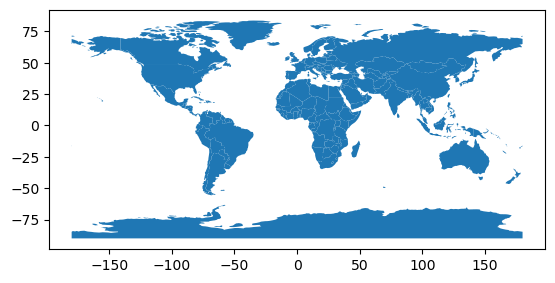

In [34]:
# using only matplotlib
import geopandas
import matplotlib.pyplot as plt

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig = world.plot()
plt.show(fig)

#### Data merging

In [35]:
world.iso_a3

0      FJI
1      TZA
2      ESH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    -99
175    TTO
176    SSD
Name: iso_a3, Length: 177, dtype: object

In [36]:
dfw = pd.merge(world, df, how='inner',  left_on='iso_a3', right_on='ISO3').fillna(0)
dfw.head()

,pop_est,continent_x,name,iso_a3,gdp_md_est,geometry,name_short,ISO2,ISO3,continent_y,...,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZ,TZA,Africa,...,3.7024,3.847233,3.557567,0.734893,0.848456,0.597017,0.425457,0.577786,0.248357,0.270454
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CA,CAN,America,...,7.0251,7.107069,6.943132,1.923639,1.886453,1.187763,0.783143,0.658886,0.216965,0.368206
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,US,USA,America,...,6.9768,7.065357,6.888243,2.213618,1.982345,1.181637,0.628134,0.574273,0.220042,0.176712
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KZ,KAZ,Asia,...,6.2341,6.329740,6.138460,1.860237,1.667982,1.220167,0.611264,0.583537,0.133794,0.157141
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,UZ,UZB,Asia,...,6.0627,6.177521,5.947879,1.913072,1.219146,1.091556,0.599748,0.715671,0.283129,0.240422


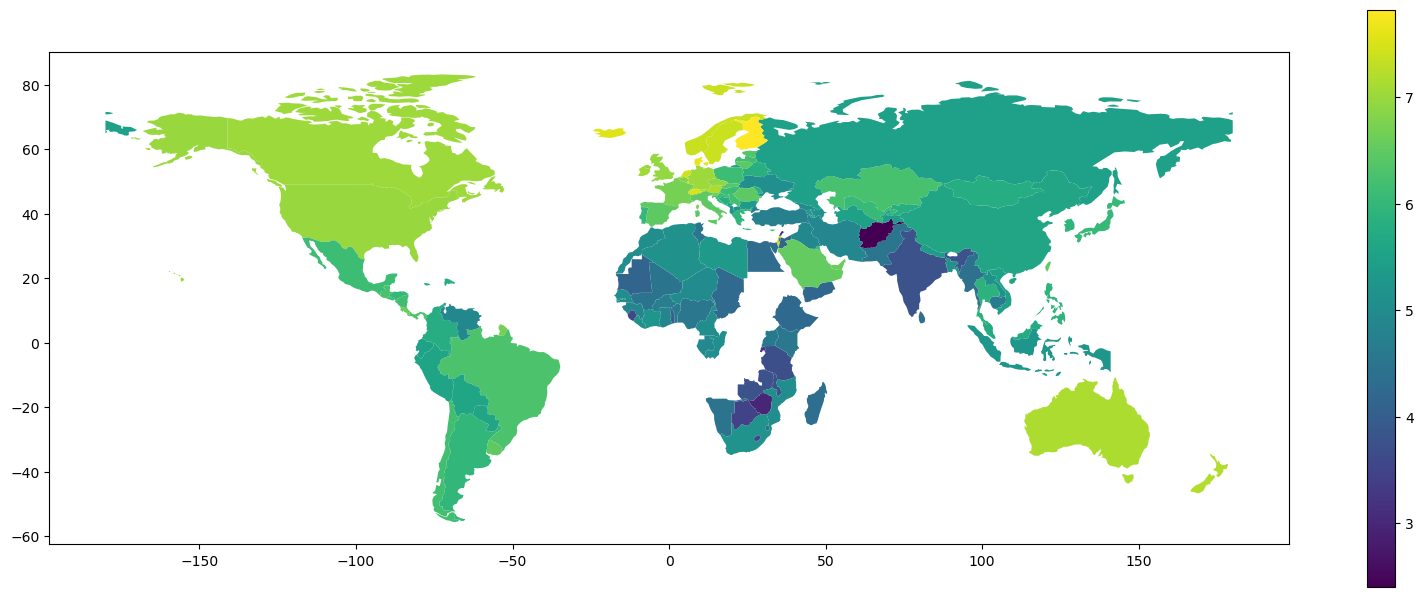

In [38]:
# visualizating using only pandas + geopandas

indicator_chosen = "Happiness score"
fig_world = dfw.plot( column= indicator_chosen, \
                                    legend=True, legend_kwds={'shrink': 0.5}, figsize=(20, 15),\
                                    missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

Text(0.5, 1.0, 'Visualization: Happiness score')

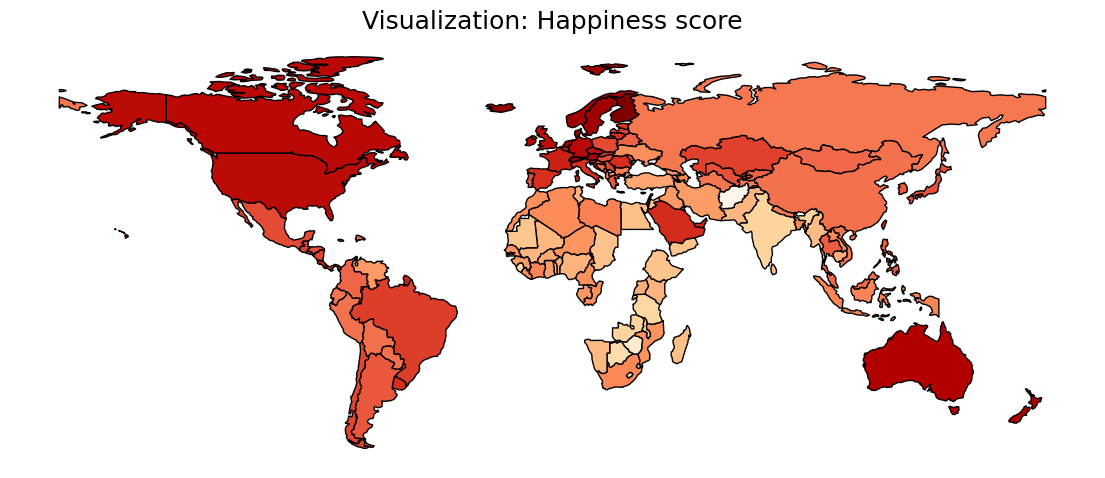

In [41]:
# visualizating using only matplotlib

import matplotlib as mpl

fig, ax = plt.subplots(1, figsize=(14, 8))
dfw.plot (column=indicator_chosen, cmap='OrRd', linewidth=1, ax=ax, edgecolor='black')
ax.axis ('off')
ax.set_title ("Visualization: {ind}".format(ind=indicator_chosen), fontsize=18)

#### Bokeh Using

In [46]:
####  Using Bokeh

import json 

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer

def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

def bokeh_plot_map(gdf, column=None, title=''):
    """Plot bokeh map from GeoJSONDataSource """

    geosource = get_geodatasource(gdf)
    palette = brewer['OrRd'][8]
    palette = palette[::-1]
    vals = gdf[column]
    
    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = vals.min(), high = vals.max())
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                         location=(0,0), orientation='horizontal')

    TOOLS = 'wheel_zoom,pan,reset'
    p = figure(title = title, plot_height=400 , plot_width=850, toolbar_location='right', tools=TOOLS)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #Add patch renderer to figure
    p.patches('xs','ys', source=geosource, fill_alpha=1, line_width=0.5, line_color='black',  
              fill_color={'field' :column , 'transform': color_mapper})
    #Specify figure layout.
    p.add_layout(color_bar, 'below')
    return p

In [45]:
output_notebook()
fig = bokeh_plot_map(dfw, column=indicator_chosen)
show(fig)

Loading BokehJS ...

In [48]:
####  Using Bokeh with HoverTool
from bokeh.models import ColumnDataSource, HoverTool, DataTable, TableColumn, StringFormatter, NumberFormatter 

output_notebook()

fig = bokeh_plot_map(dfw, column=indicator_chosen)
fig.add_tools(hover)
show(fig)

Loading BokehJS ...

#### Putting altogether

In [50]:

title = Div(text='<h3>World Happiness Report 2022 -- Data for Figure 2.1</h3> <ul><li>HTML source: <a href="https://worldhappiness.report/ed/2022/#appendices-and-data" rel="noopener" target="_blank">WHR 2022</a></li><li>Data source: <a href="https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls" rel="noopener" target="_blank">Data for Figure 2.1</a></li></ul>')

output_notebook()
output_file ( filename = "WHR 2022-Figure 2.1_with_worldmap.htm", title = 'World Happiness Report 2022 -- Data for Figure 2.1',\
              mode = 'inline')
#save (column(title, plot_Bokeh))

show (column(title, plot_Bokeh, fig))

Loading BokehJS ...

In [ ]:
# future work ColumnDataSource linking

### Data analysis
#### by regions

In [22]:
dfUNr = df.groupby("UNregion")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfUNr.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
UNregion,,,,,,,,,,,
Australia and New Zealand,11.000000,7.180950,7.261461,7.100439,1.982457,1.875965,1.219009,0.762210,0.678125,0.251135,0.412024
Western Europe,11.285714,7.145614,7.223593,7.067635,2.114094,1.972136,1.166285,0.788586,0.613484,0.144741,0.346302
Northern Europe,16.300000,7.071420,7.148575,6.994265,2.022052,1.902262,1.222933,0.749608,0.653440,0.173076,0.348036
Northern America,15.500000,7.000950,7.086213,6.915687,2.068629,1.934399,1.184700,0.705638,0.616580,0.218504,0.272459
Central America,42.000000,6.226800,6.370979,6.082621,2.422781,1.372175,0.937105,0.625257,0.628868,0.114346,0.126271
Southern Europe,51.692308,6.035031,6.140365,5.929697,1.896571,1.642704,1.042885,0.718071,0.520854,0.144568,0.069359
Eastern Europe,57.000000,5.958810,6.056950,5.860670,1.832004,1.647598,1.140780,0.649256,0.509222,0.108814,0.071125
Central Asia,63.600000,5.795340,5.893711,5.696969,1.782879,1.281288,1.149063,0.576585,0.642558,0.211391,0.151572


In [23]:
dfUNr = df.groupby("continent")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfUNr.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
continent,,,,,,,,,,,
Oceania,11.000000,7.180950,7.261461,7.100439,1.982457,1.875965,1.219009,0.762210,0.678125,0.251135,0.412024
Europe,37.100000,6.469425,6.561129,6.377721,1.949866,1.766468,1.133966,0.721092,0.567303,0.142787,0.187935
America,52.095238,6.050409,6.173661,5.927158,2.164618,1.404387,1.001562,0.649002,0.582301,0.124007,0.124534
Asia,81.232558,5.337644,5.444004,5.231285,1.540181,1.447771,0.890334,0.618262,0.528754,0.157801,0.154538
Africa,115.950000,4.527645,4.691010,4.364280,1.844988,0.994145,0.628449,0.374875,0.412545,0.147824,0.124821


In [24]:
dfUNr = df.groupby("UNregion")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfUNr.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
UNregion,,,,,,,,,,,
Australia and New Zealand,11.000000,7.180950,7.261461,7.100439,1.982457,1.875965,1.219009,0.762210,0.678125,0.251135,0.412024
Western Europe,11.285714,7.145614,7.223593,7.067635,2.114094,1.972136,1.166285,0.788586,0.613484,0.144741,0.346302
Northern Europe,16.300000,7.071420,7.148575,6.994265,2.022052,1.902262,1.222933,0.749608,0.653440,0.173076,0.348036
Northern America,15.500000,7.000950,7.086213,6.915687,2.068629,1.934399,1.184700,0.705638,0.616580,0.218504,0.272459
Central America,42.000000,6.226800,6.370979,6.082621,2.422781,1.372175,0.937105,0.625257,0.628868,0.114346,0.126271
Southern Europe,51.692308,6.035031,6.140365,5.929697,1.896571,1.642704,1.042885,0.718071,0.520854,0.144568,0.069359
Eastern Europe,57.000000,5.958810,6.056950,5.860670,1.832004,1.647598,1.140780,0.649256,0.509222,0.108814,0.071125
Central Asia,63.600000,5.795340,5.893711,5.696969,1.782879,1.281288,1.149063,0.576585,0.642558,0.211391,0.151572


-----

#### by groups

In [25]:
dfG7 = df.groupby("G7")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfG7.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
G7,,,,,,,,,,,
G7,23.857143,6.738686,6.822677,6.654694,1.97869,1.884447,1.137103,0.773145,0.561577,0.150149,0.253542


In [26]:
dfG20 = df.groupby("G20")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfG20.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
G20,,,,,,,,,,,
G20,40.636364,6.352511,6.441905,6.263118,1.87216,1.776382,1.098474,0.715912,0.5664,0.133581,0.189597


In [27]:
dfAPEC = df.groupby("APEC")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfAPEC.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
APEC,,,,,,,,,,,
APEC,51.105263,6.09939,6.190101,6.008678,1.704708,1.69626,1.031717,0.712968,0.585009,0.169258,0.19947


In [28]:
dfCIS = df.groupby("CIS")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfCIS.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
CIS,,,,,,,,,,,
CIS,69.625,5.67285,5.77289,5.57281,1.733394,1.426209,1.061256,0.596041,0.541711,0.108938,0.205295


In [29]:
dfBRIC = df.groupby("BRIC")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfBRIC.sort_values (( 'Happiness score', 'mean'), ascending = False)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
BRIC,,,,,,,,,,,
BRIC,81.5,5.27845,5.346899,5.210001,1.541313,1.455513,0.868324,0.594184,0.562841,0.136364,0.119918


## Data: World Power Index
* HTML source: [World Power Index (WPI)](https://www.worldpowerindex.com/)
* Data source:

In [30]:
## to do 2023/02

## Data: Human Freedom Index
* HTML source: [Human Freedom Index](https://www.cato.org/human-freedom-index/2022)
* Data source:
<strong><a href="https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.xlsx" target="_blank" rel="nofollow noopener">XSLX</a> | <a href="https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.csv" target="_blank" rel="nofollow noopener">CSV</a> | <a href="https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.dta" target="_blank" rel="nofollow noopener">DTA</a> | <a href="https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.json" target="_blank" rel="nofollow noopener">JSON</a></strong>

In [31]:
## to do 2023/02